In [2]:
from dateutil.parser import parse
import graphlab as gl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import entropy
from pysal.inequality import gini

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1475167692.log


This non-commercial license of GraphLab Create for academic use is assigned to jlorince@indiana.edu and will expire on May 03, 2017.


In [3]:
totals_pubs = pd.Series(index=pd.date_range('1950-01-01','2015-12-31',freq='AS',),data=[97529,102475,106673,108515,113949,100346,115704,122845,133961,137311,152292,179267,188095,196106,221271,288753,327167,349344,364851,399384,405709,420089,448565,459029,495345,566369,606671,683684,703905,728908,749425,775628,810977,875161,893747,893536,909200,920189,901468,856502,880419,901808,922010,963477,1015818,1080336,1130853,1159929,1161957,1187808,1205276,1189963,1234480,1270516,1356955,1434957,1495934,1567550,1655220,1716898,1750645,1836125,1913473,2005909,2027312,1809485,])

In [4]:
sf_joined = gl.SFrame('../data/econophysics_joined.sframe/')

In [5]:
df = sf_joined.to_dataframe()
df['date'] = df['date'].apply(lambda x: parse(x))
df = df[df['date']<parse('2016-01-01')]
df['year'] = df['date'].apply(lambda x: x.year)

In [6]:
first_year = df['year'].min()

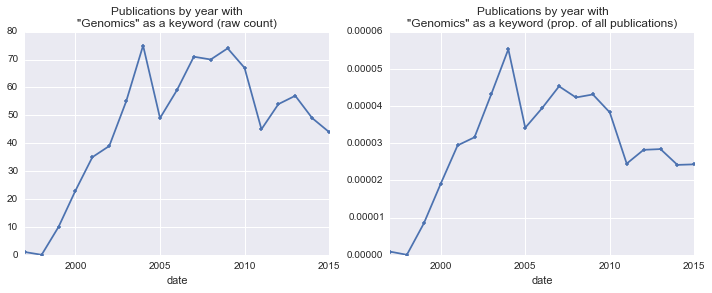

In [7]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
df.set_index('date').resample('AS')['uid'].count().plot(marker='.',ax=axes[0])
axes[0].set_title('Publications by year with\n"Genomics" as a keyword (raw count)')
(df.set_index('date').resample('AS')['uid'].count() / totals_pubs[str(first_year):]).plot(marker='.',ax=axes[1])
axes[1].set_title('Publications by year with\n"Genomics" as a keyword (prop. of all publications)')

In [8]:
journal_piv = df.groupby(['year','source_title'])['uid'].count().reset_index().pivot_table(index='year',columns='source_title',values='uid').fillna(0)
#.plot.area(legend=False)

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:968: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"
/Users/jaredlorince/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


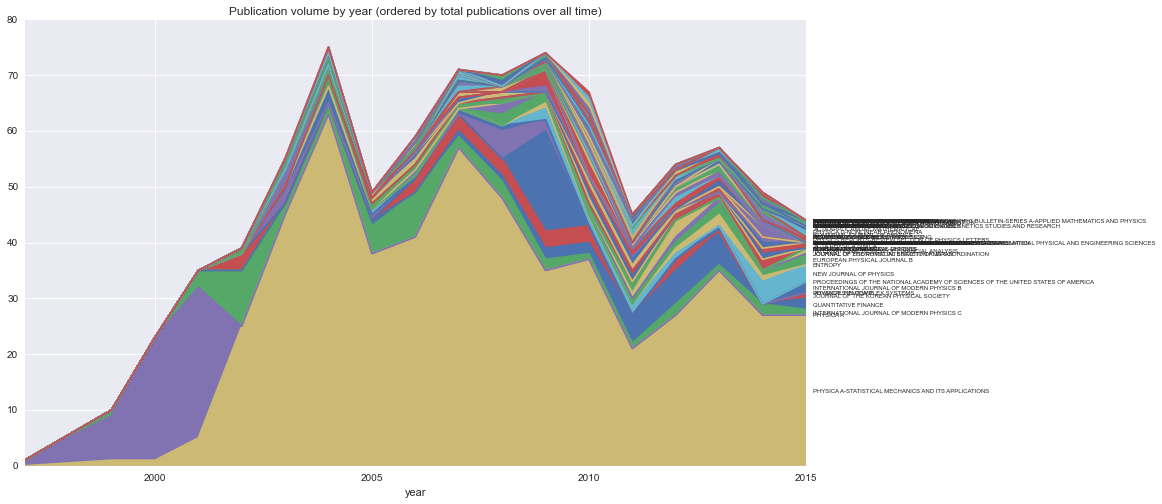

In [9]:
n_journals = 100
pop_sorted_journals =journal_piv.sum(0).reset_index()
colors = list(sns.color_palette(n_colors=len(pop_sorted_journals)))
#np.random.seed(7)
#np.random.shuffle(colors)
pop_sorted_journals['color'] = colors
journals = pop_sorted_journals.sort_values(0,ascending=False)[:n_journals]
fig,ax = plt.subplots(1,1,figsize=(14,8))
journal_piv[journals['source_title']].plot.area(legend=False,ax=ax,colors=journals['color'])
ax2 = ax.twinx()
ax2.grid()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks((journal_piv[journals['source_title']].ix[2015].cumsum().values - journal_piv[journals['source_title']].ix[2015]*.5))
ax2.set_yticklabels(journal_piv[journals['source_title']].ix[2015].index.values,fontsize=6);
ax.set_title('Publication volume by year (ordered by total publications over all time)');

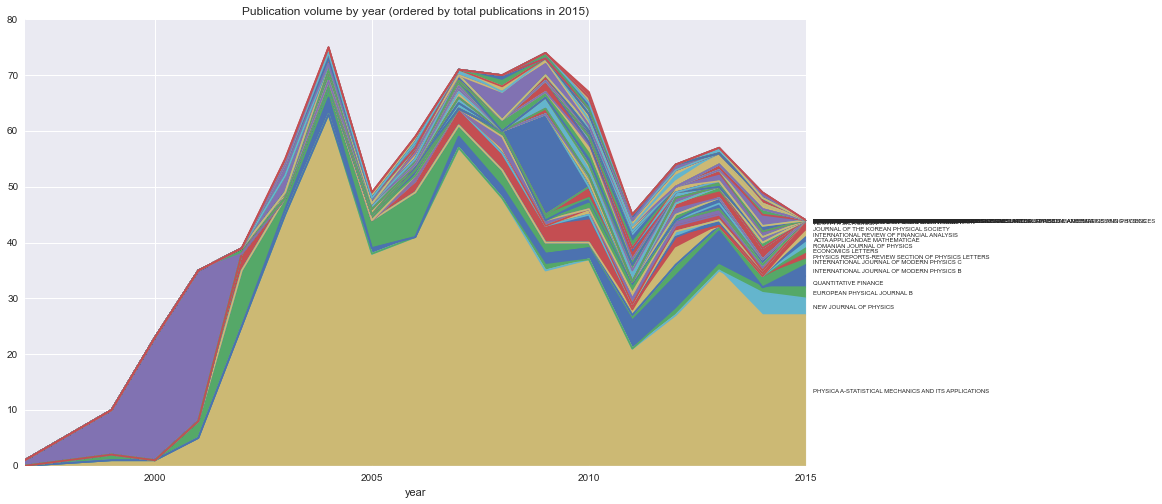

In [17]:
n_journals = 100
pop_sorted_journals =journal_piv.ix[2015].reset_index()
colors = list(sns.color_palette(n_colors=len(pop_sorted_journals)))
# np.random.seed(7)
# np.random.shuffle(colors)
pop_sorted_journals['color'] = colors
journals = pop_sorted_journals.sort_values(2015,ascending=False)[:n_journals]
fig,ax = plt.subplots(1,1,figsize=(14,8))
journal_piv[journals['source_title']].plot.area(legend=False,ax=ax,colors=journals['color'])
ax2 = ax.twinx()
ax2.grid()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks((journal_piv[journals['source_title']].ix[2015].cumsum().values - journal_piv[journals['source_title']].ix[2015]*.5))
ax2.set_yticklabels(journal_piv[journals['source_title']].ix[2015].index.values,fontsize=6);
ax.set_title('Publication volume by year (ordered by total publications in 2015)');

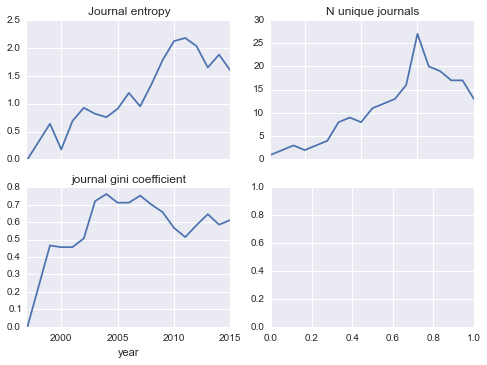

In [11]:
fix,axes = plt.subplots(2,2)

df.groupby('year').apply(lambda x: entropy(x['source_title'].value_counts().values)).plot(ax=axes[0,0],title='Journal entropy')
df.groupby('year').apply(lambda x: len(x['source_title'].unique())).plot(ax=axes[0,1],title='N unique journals')
df.groupby('year').apply(lambda x: gini.Gini(x['source_title'].value_counts().values).g).plot(ax=axes[1,0],title='journal gini coefficient')

for ax in axes[0]:
    ax.set_xticklabels([])
    ax.set_xlabel('')

In [20]:
rows = []
for row in df.itertuples():        
     [rows.append([row.uid,c]) for c in row.categories.split('|')]
kw = pd.DataFrame(rows,columns=['uid','cat'])
merged = kw.merge(df,on='uid')

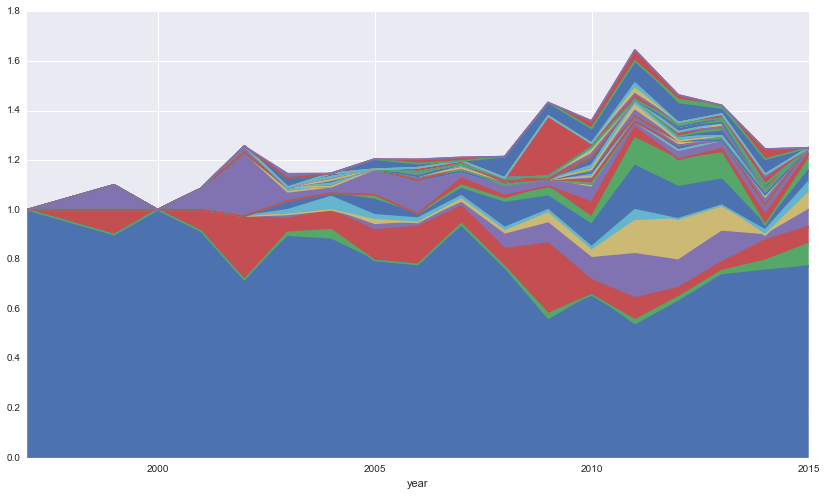

In [21]:
totals = df.groupby('year')['uid'].count()
fig,ax = plt.subplots(1,1,figsize=(14,8))
piv_cats = merged.groupby(['year','cat'])['uid'].count().reset_index().pivot(index='year',columns='cat',values='uid').fillna(0).divide(totals,axis=0)
srt = piv_cats.ix[2015].sort_values(ascending=False).index
piv_cats[srt].plot.area(legend=False,ax=ax)

In [22]:
srt[:10]

Index([u'Physics, Multidisciplinary', u'Physics, Condensed Matter',
       u'Physics, Mathematical', u'Economics', u'Business, Finance',
       u'Physics, Applied', u'Mathematics, Interdisciplinary Applications',
       u'Social Sciences, Mathematical Methods', u'Mathematics, Applied',
       u'Computer Science, Interdisciplinary Applications'],
      dtype='object', name=u'cat')